In [0]:
!pip install quandl

     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 2.3MB 8.2MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=272d88f8062e075f6df02f58690dbf561466efb09a5268f59961d14f64390873
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 8.0.0
    Uninstalling more-itertools-8.0.0:
      Successfully uninstalled more-itertools-8.0.0


In [0]:
#stock prediction lame lmao
#ps : idk anythig about the stock mark
#Install the dependencies
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
#get stock data form the stoc market kind of obvius
stock = "WIKI/AMZN"
#FB
#AMZN
#AAPL
#NYC
df = quandl.get(stock)
#print it out
print(df.head())

             Open   High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                   
1997-05-16  22.38  23.75  20.50  ...  1.708333    1.729167   14700000.0
1997-05-19  20.50  21.25  19.50  ...  1.625000    1.708333    6106800.0
1997-05-20  20.75  21.00  19.63  ...  1.635833    1.635833    5467200.0
1997-05-21  19.25  19.75  16.50  ...  1.375000    1.427500   18853200.0
1997-05-22  17.25  17.38  15.75  ...  1.312500    1.395833   11776800.0

[5 rows x 12 columns]


In [0]:
  #only get the adj close value
#  df = df[['Adj. Close']]
df = df[['High']]
  #print adj.close
print(df.head())

             High
Date             
1997-05-16  23.75
1997-05-19  21.25
1997-05-20  21.00
1997-05-21  19.75
1997-05-22  17.38


In [0]:
#predicitve variable for 'n' days into the future
forecasrt_out =30
#another column for the target or depedent variable to be shifted n units up
#df ['Prediction'] = df[['Adj. Close']].shift(-forecasrt_out)
df ['Prediction'] = df[['High']].shift(-forecasrt_out)
print(df.tail())

               High  Prediction
Date                           
2018-03-21  1590.00         NaN
2018-03-22  1573.85         NaN
2018-03-23  1549.02         NaN
2018-03-26  1556.99         NaN
2018-03-27  1575.96         NaN


In [0]:
X = np.array(df.drop(['Prediction'],1))
#remove last 'n' rows
X = X[:-forecasrt_out]
print(X)

[[  23.75]
 [  21.25]
 [  21.  ]
 ...
 [1433.75]
 [1383.5 ]
 [1393.81]]


In [0]:
### create the dependent data set (y)
# conver dataframe to array(all values including NaN;s)
y = np.array(df['Prediction'])
#get all the y values except the last 'n' rows
y = y[:-forecasrt_out]
print(y)

[  19.19   18.5    19.13 ... 1549.02 1556.99 1575.96]


In [0]:
#spliting data to 80 training and 20 testing
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
#Creating and training suppourt vector training machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Score returns the prediciton the coefficent and determination R^2 of the prediction.
#best possible socre is 1.0
svm_cinfidence = svr_rbf.score(x_test,y_test)
print("svm cconfidence: ", svm_cinfidence)

svm cconfidence:  0.945663903965852


In [0]:
#create and train the linear regression model
lr = LinearRegression()
#train the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr_cinfidence = lr.score(x_test,y_test)
print("lr cconfidence: ", svm_cinfidence)

lr cconfidence:  0.945663903965852


In [0]:
#set x_forecast equal to the last 30 rows of Adj. Close
x_forecast  = np.array(df.drop(['Prediction'],1))[-forecasrt_out:]
print(x_forecast)

[[1419.72]
 [1452.06]
 [1468.94]
 [1465.8 ]
 [1488.77]
 [1503.49]
 [1502.54]
 [1500.  ]
 [1522.84]
 [1526.78]
 [1528.7 ]
 [1518.49]
 [1501.05]
 [1525.38]
 [1542.13]
 [1545.9 ]
 [1554.88]
 [1578.94]
 [1605.33]
 [1617.54]
 [1606.44]
 [1596.91]
 [1589.44]
 [1561.66]
 [1587.  ]
 [1590.  ]
 [1573.85]
 [1549.02]
 [1556.99]
 [1575.96]]


lr predictions
[1499.68039406 1533.92074583 1551.79264249 1548.46813091 1572.78788601
 1588.37285751 1587.36703394 1584.67777935 1608.85989544 1613.03141634
 1615.06423871 1604.25428226 1585.78947908 1611.54915003 1629.28340767
 1633.2749391  1642.78261872 1668.25642402 1696.19714398 1709.12462373
 1697.37236941 1687.28237088 1679.37342135 1649.96102271 1676.79004293
 1679.96632788 1662.86732722 1636.57827545 1645.0166058  1665.10131431]
svm predictions
[ 673.6626012   679.76080863  920.01790418  740.16743144  673.83980868
  717.25339288  786.69742292 1268.83786793  673.6626012   673.6626012
  673.6626012   673.6626012  1023.89815119  673.6626012   673.6626012
  673.6626012   673.6626012   673.6626012   673.6626012   673.6626012
  673.6626012   673.6626012   673.6626012   673.6626012   673.6626012
  673.6626012   673.6626012   673.6626012   673.6626012   673.6626012 ]
lr plot,svm plot


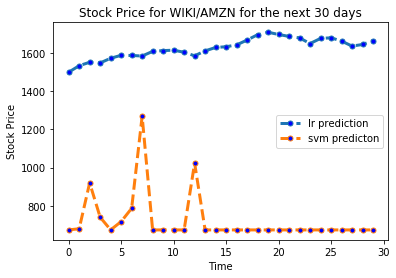

In [0]:
#prediciotion for the next 'n' days linear regretion
lr_prediciton = lr.predict(x_forecast)
print('lr predictions')
print(lr_prediciton)
#prediciotion for the next 'n' days suppourt vector
svm_prediciton = svr_rbf.predict(x_forecast)
print('svm predictions')
print(svm_prediciton)
print('lr plot,svm plot')
plt.plot(lr_prediciton,label='lr prediction',linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)
plt.plot(svm_prediciton,label='svm predicton',linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price for '+stock+' for the next 30 days')
plt.legend()
#plot it
plt.show()

In [0]:
#END